In [120]:
import pandas as pd
import numpy as np
import altair as alt
alt.renderers.enable('notebook')
alt.data_transformers.enable('default', max_rows=None) 

DataTransformerRegistry.enable('default')

In [533]:
df = pd.read_csv('population_prospects.csv')

In [534]:
df.head()

,year,population,type
0,1950,37297.640,estimate
1,1951,37815.540,estimate
2,1952,38360.078,estimate
3,1953,38915.814,estimate
4,1954,39471.403,estimate


In [535]:
df['annotation'] = 'Data: UN World Population Prospects'

In [536]:
annotation1 = []
type_texts = ['medium variant', 'high variant', 'low variant',
       'constant fertility', 'instant replacement', 'momentum',
       'zero migration', 'constant mortality', 'no change']
colors = ['#d53e4f', '#d53e4f', '#d53e4f', 
         '#5D646F', '#5D646F', '#5D646F', 
         '#5D646F', '#5D646F', '#5D646F']
dys = [-4,1,0,
      -2,-1,0,
      4,2,0]

for t, c, dy in zip(type_texts, colors, dys):
    annotation1.append(alt.Chart(df).mark_text(
        align='left',
        baseline='middle',
        fontSize = 13,
        font='Ubuntu Mono',
        color=c,
        dx = 12,
        dy = dy
    ).transform_filter(
        'datum.year >= 2100 & datum.type == "{}"'.format(t)
    ))
annotation = annotation1[0]
for a in annotation1[1:]:
    annotation = annotation + a

annotation = annotation.encode(
    x=alt.X('year', scale=alt.Scale(domain=[1950, 2100])),
    y=alt.Y('y:Q', scale=alt.Scale(domain=[15, 55])),
    text='type'
)

In [537]:
annotation2 = alt.Chart(df).mark_text(
        align='center',
        baseline='middle',
        fontSize = 13,
        font='Ubuntu Mono',
        color='#3288bd',
        dy=-80
    ).encode(
        x=alt.X('year', scale=alt.Scale(domain=[1950, 2100])),
        y=alt.Y('y:Q', scale=alt.Scale(domain=[15, 55])),
        text='type'
    ).transform_filter(
        'datum.year==1980'
)

annotation3 = alt.Chart(df).mark_text(
        align='center',
        baseline='middle',
        fontSize = 13,
        font='Ubuntu Mono',
        color='#d53e4f',
        dy=-247
    ).encode(
        x=alt.X('year', scale=alt.Scale(domain=[1950, 2100])),
        y=alt.Y('y:Q', scale=alt.Scale(domain=[15, 55])),
        text='type'
    ).transform_filter(
        'datum.year==2060 & datum.type=="momentum"'
)

annotation4 = alt.Chart(df).mark_text(
        align='center',
        baseline='middle',
        fontSize = 13,
        font='Ubuntu Mono',
        color='#5D646F',
        dy=295,
        dx=25
    ).encode(
        x=alt.X('year', scale=alt.Scale(domain=[1950, 2100])),
        y=alt.Y('y:Q', scale=alt.Scale(domain=[15, 55])),
        text='annotation'
    ).transform_filter(
        'datum.year==2100 & datum.type=="momentum"'
)
annotation_top = annotation2 + annotation3 + annotation4

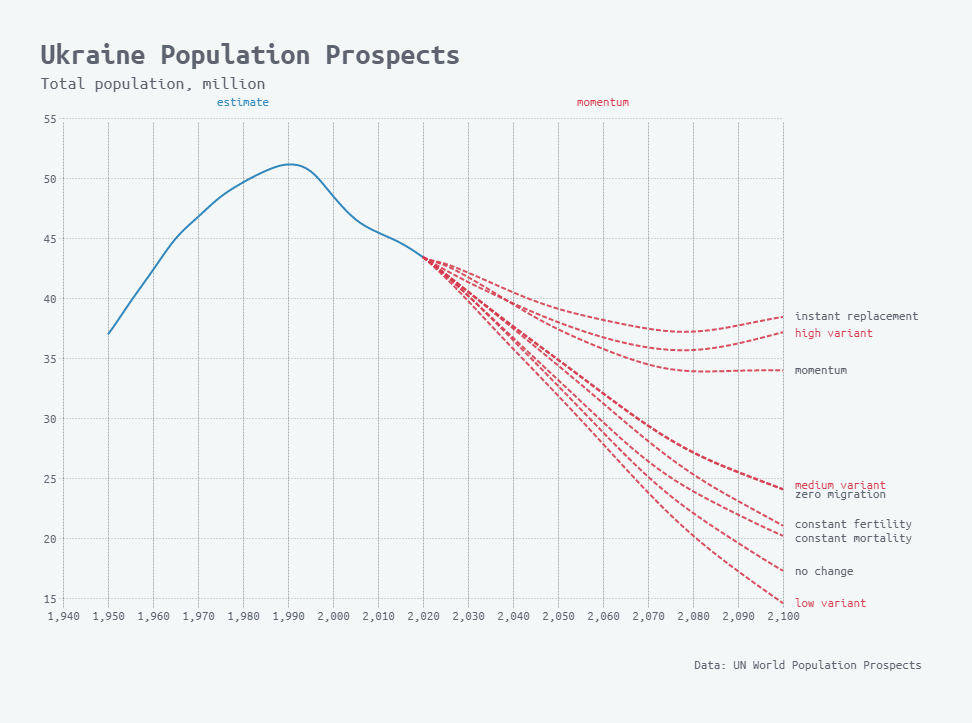

In [539]:
chart1 = alt.Chart(df, width=720, height=480).mark_line(color='#3288bd').encode(
    x=alt.X('year', scale=alt.Scale(domain=[1950, 2100])),
    y=alt.Y('y:Q', scale=alt.Scale(domain=[15, 50]))
).transform_filter(
    'datum.type == "estimate"'
)

chart2 = [
    alt.Chart(df, width=720, height=480
    ).mark_line(
        color='#d53e4f',
        strokeDash=(5,2),
        strokeWidth=2,
        strokeOpacity=.9
    ).encode(
        x=alt.X('year', scale=alt.Scale(domain=[1950, 2100])),
        y=alt.Y('y:Q', scale=alt.Scale(domain=[15, 55]))
    ).transform_filter(
        'datum.type == "{}"'.format(t) 
    )
    for t in filter(lambda x: (x != 'estimate') & (x != 'line'), df.type.unique())
]

chart = chart1 + annotation + annotation_top
for c in chart2:
    chart = chart + c

chart = chart.transform_calculate(y = 'datum.population / 1000')
    
subtitle = alt.Chart(
    {"values": [{"text": "          Total population, million"}]}
).mark_text(size=18, 
            color='#5D646F', 
            font='Ubuntu Mono',
            align='center'
).encode(
    text="text:N"
)

alt.vconcat(
    subtitle,
    chart
).properties(
    padding={'left': -50, 'top': 40, 'right': 50, 'bottom': 50},
    title=alt.TitleParams('Ukraine Population Prospects',dx=90),
    background='#F3F7F7'
#     subtitle='af'
).configure_title(
    color='#5D646F',
    font='Ubuntu Mono',
    fontSize=30,
    anchor='start'
).configure_view(
    stroke=None
).configure_concat(
    spacing=1
).configure_axis(
    labelFont='Ubuntu Mono',
    labelColor='#5D646F',
    labelFontSize=13,
    domain=False, # to make remove baseline axes,
    tickColor='#5D646F',
    tickWidth=.5,
    gridColor='#5D646F',
    gridDash=(1,2), # (stroke, space)
    gridWidth=.5,
    gridDashOffset=15,
#     labelBound=1000
).configure_axisX(
    title=None,
#     titleFont='Ubuntu Mono',
#     titleColor='#5D646F',
#     titleFontSize=13,
#     titleFontWeight='normal',
    titleX=720,
    titleY=50,
    gridDash=(2,1),
    tickDash=(2,1),
    labelFlush=False,
#     grid=False,
#     ticks=False,
#     labels=False
).configure_axisY(
    title=None,
    tickDash=(1,2),
    tickOffset=-4
)